In [22]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [24]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx, mode='constant')
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [3]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [120]:
def threshold(img, lowThresholdRatio, highThresholdRatio):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = img.max() * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(155)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img > highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return res

In [90]:
def hysteresis(img, weak=155, strong=255):
    M, N = img.shape  
    out_img = img[:]
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        out_img[i, j] = strong
                    else:
                        out_img[i, j] = 0
                except IndexError as e:
                    pass
    return out_img

(1050, 670, 3)
(1050, 670)


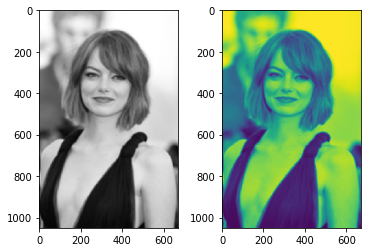

In [68]:
t = plt.imread("test1.png")
tg = rgb2gray(t)
print (t.shape)
print (tg.shape)

plt.figure(1)
plt.subplot(121)
plt.imshow(t)
plt.subplot(122)
plt.imshow(tg)

In [121]:
t_grad = sobel_filters(tg)
t_non_max = non_max_suppression(t_grad[0], t_grad[1])
t_th = threshold(t_non_max, lowThresholdRatio=0.03, highThresholdRatio=0.1)
t_hysteresis = hysteresis(t_th)

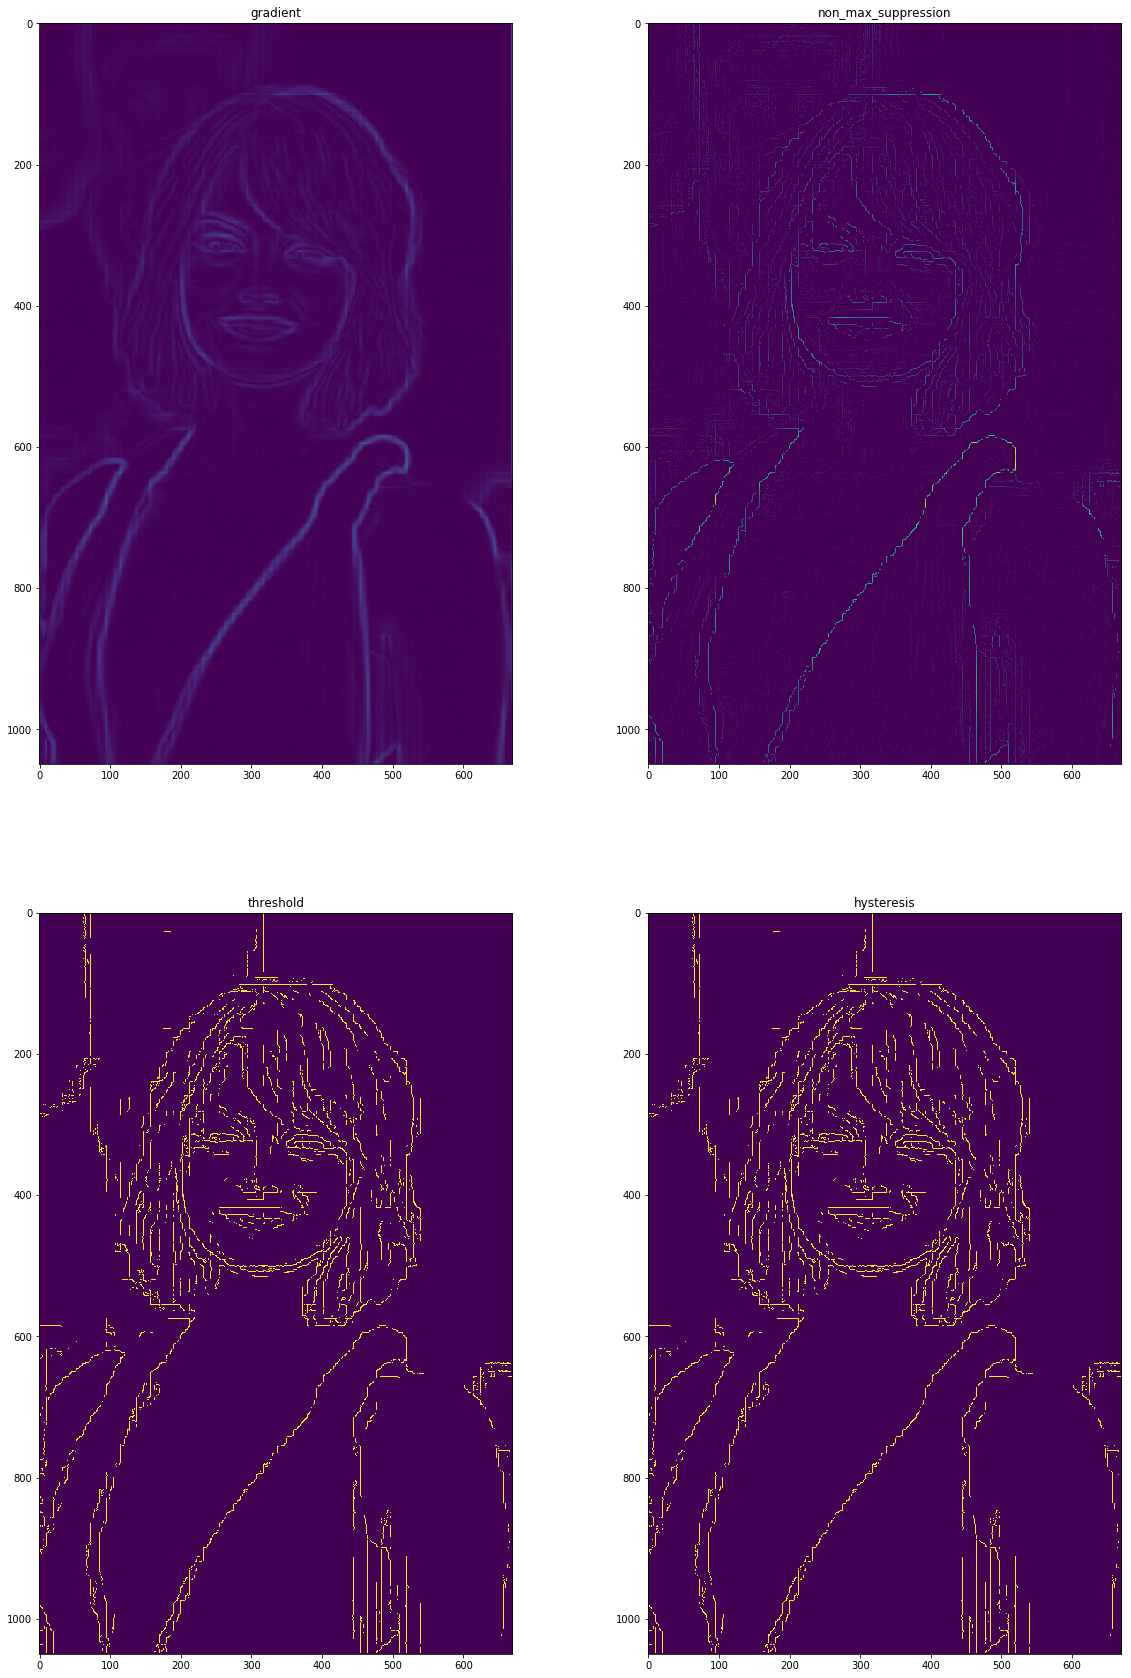

In [122]:
plt.figure(1, figsize = (20,30))
plt.subplot(221)
plt.title("gradient")
plt.imshow(t_grad[0])
plt.subplot(222)
plt.title("non_max_suppression")
plt.imshow(t_non_max)
plt.subplot(223)
plt.title("threshold")
plt.imshow(t_th)
plt.subplot(224)
plt.title("hysteresis")
plt.imshow(t_hysteresis)

In [123]:
np.where(t_th == 155)

(array([], dtype=int64), array([], dtype=int64))

In [124]:
t_non_max.max()*0.03

2.34

In [125]:
np.sum((t_non_max > 2.34) & (t_non_max < 7.80))

28237

In [126]:
np.sum(t_non_max >= 7.80)

16240

In [127]:
np.sum(t_th == 255)

19580